### Stpes: 
- Algo
#### 1. Read dataset
- load data set
- check info, statistical info etc.
- understand the dataset
#### 2. Visualizing the dataset
- plot pair plot (scatter plot for all indep variable
- plot heatmop for correlation
#### 3. Performing simple linear regression
- take x and y
- split the data into train and test dataset
- build a linear model using statsmodel
- build model on train dataset
- add constant on train dataset
- find params and summary
- plot predicted line
#### 4. Residual analysis
- find predict value for train data
- plot error terms
#### 5. prediction on test set
- build model on test dataset
- add constant on test dataset
- find params and summary
- find predict value
- evaluat RMSE and R sq.
- plot predict line
#### 6. Linear regression using sklearn
- split data into train and test data
- if X variables have 1D shape then reshape it 2D
- fit the model (train data)
- find coeff. and intercept
- evaluate R sq, for train as well as test data

### Step 1: Reading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [5]:
# read csv file
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


- inspet the various aspects of our dataframe

In [8]:
advertising.shape    # 200 rows and 4 columns

(200, 4)

In [9]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# check if there is any null value
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# statistical information of data
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Step 2: Visualising the Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

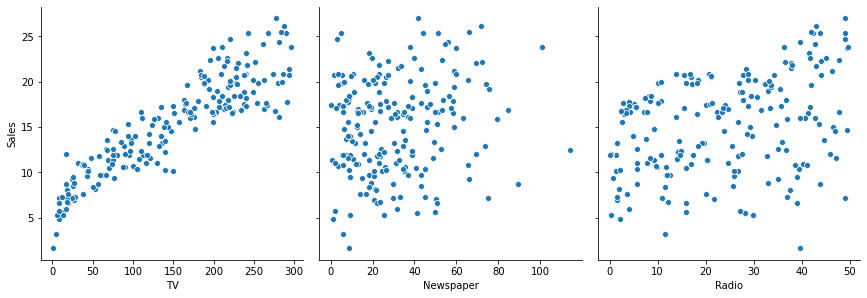

In [23]:
# scatter plot of all independent variables

sns.pairplot(advertising, x_vars=['TV','Newspaper','Radio'], y_vars='Sales',size=4,aspect=1,kind='scatter')
plt.show()

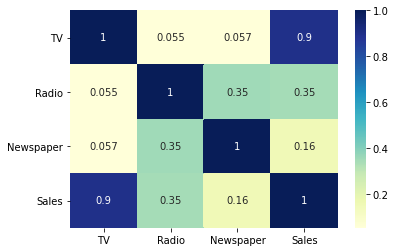

In [24]:
# correlation plot

sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)
plt.show()

### Step 3: Performing Simple LInear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

In [25]:
# here we use one indep variable which is X 'TV'

X = advertising['TV']  # independent variable
y = advertising['Sales']  # dependent variable

#### Split data into two dataset testing and training dataset

In [26]:
# importing library for train test split

from sklearn.model_selection import train_test_split

In [27]:
# training dataset with 70% and testing data 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [29]:
# look at the train dataset 
 
X_train.head()   # indep

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
y_train.head()  # depen

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model by Statsmodel.api

In [33]:
# importing statsmodel.api

import statsmodels.api as sm

In [52]:
# adding constant to get an intercept

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [53]:
# fit the regression line using OLS (Ordinary Least Sq.)

lr = sm.OLS(y_train, X_train_sm).fit()

In [54]:
# print the prameter m(coeff. of variable) and c(constant)

lr.params 

const    6.948683
TV       0.054546
dtype: float64

In [55]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.52e-52
Time:                        16:20:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 
2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV
This is a decent R-squared value.
3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

- The fit is significant. Let's visualize how well the model fit the data.
- From the parameters that we get, our linear regression equation becomes:

- Sales=6.948+0.054×TV

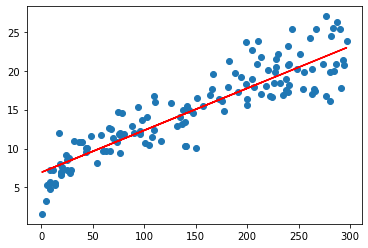

In [49]:
plt.scatter(X_train, y_train)

# r (red) color of predicted line

plt.plot(X_train, 6.948+0.054*X_train, 'r')
plt.show()

### Step 4: Residual Analysis

In [59]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)  # residual RSS

- Distribution od error term

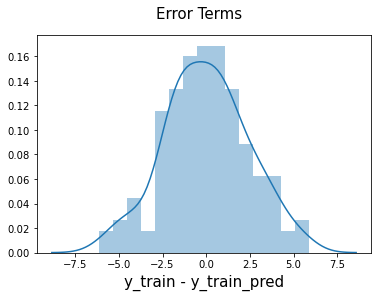

In [64]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

- The residuals are following the normal distributed with mean 0. 
- All good!

#### Looking for pattern in the residuals

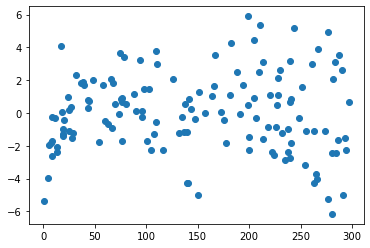

In [65]:
plt.scatter(X_train, res)
plt.show()

- We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

- Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

- As you can see, the regression line is a pretty good fit to the data

### Step 5: Predictions on the Test Set

In [68]:
# add constant to X_test

X_test_sm = sm.add_constant(X_test)

# predict the y values corresponding to X_test_sm

y_test_pred = lr.predict(X_test_sm)

In [69]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

#### Calculate RMSE and R sq

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [72]:
# Mean sq. error
MSE = mean_squared_error(y_test, y_test_pred)
MSE

4.077556371826953

In [75]:
# square root of MSE (Root Mean Sq. Error)
RMSE = np.sqrt(MSE)
RMSE

2.019296008966232

In [76]:
# R-sq.
r_sq = r2_score(y_test, y_test_pred)
r_sq

0.792103160124566

#### visualizing the fit on the test set

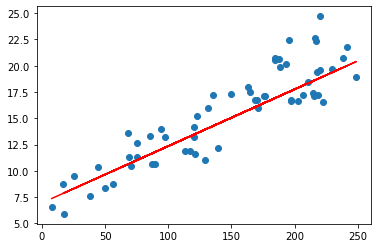

In [77]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.
plt.show()

### Linear Regression using sklearn

- 1. load data
- 2. visualize it
- 3. split data into train and test
- 4. create an obj. of linear regression
- 5. fir the model
- 6. see the params, make prediction
- 7. evaluate (R sq. , etc.)

In [93]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [94]:
# split data

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [95]:
X_train_lm.shape  # X variable in 1-D

(140,)

In [96]:
# reshape it into 2-D 
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [92]:
print(X_train_lm.shape)   # 2-D
print(y_train_lm.shape)   # 1-D
print(X_test_lm.shape)    # 2-D
print(y_test_lm.shape)    # 1-D

(140, 1)
(140,)
(60, 1)
(60,)


In [97]:
lr = LinearRegression()

# fit the model using .fit()
lr.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# to see the parameters of train dataset

print(lr.coef_)     # coeff. of X(train) variable
print(lr.intercept_)  # constant (c)

[0.05454575]
6.948683200001357


The equationwe get is the same as what we got before!

Sales=6.948+0.054∗TV

In [100]:
# we get same eq. as we compute using statsmodels

#### make prediction for train as well as test dataset

In [101]:
y_train_pred = lr.predict(X_train_lm)
y_test_pred = lr.predict(X_test_lm)

#### evatualte the model R sq. 

In [102]:
r2_train = r2_score(y_train_lm, y_train_pred)
r2_test = r2_score(y_test_lm, y_test_pred)

In [104]:
print("R sq. for train dataset: ", r2_train)
print("R sq. for test dataset: ", r2_test)

R sq. for train dataset:  0.8157933136480389
R sq. for test dataset:  0.7921031601245662
